<h1 align=center> Proceso de EDA</h1>

In [ ]:
# Instalacion de librerias de ser necesario
%pip install -r requirements.txt

In [73]:
# Importacion de librerias 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Ubicaciones de los archivos 
siniestros_data = pd.read_csv('Database/Data_siniestros.csv') 

In [75]:
# Chequeo de la informacion del dataframe
siniestros_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               717 non-null    object 
 1   Num_Victimas     717 non-null    int64  
 2   Fecha            717 non-null    object 
 3   Año              717 non-null    int64  
 4   Mes              717 non-null    int64  
 5   Dia              717 non-null    int64  
 6   Horas            717 non-null    object 
 7   Hora             716 non-null    float64
 8   Lugar_del_hecho  717 non-null    object 
 9   Tipo_calle       717 non-null    object 
 10  Calle            717 non-null    object 
 11  Direccion        717 non-null    object 
 12  Comuna           717 non-null    int64  
 13  Coordenadas      717 non-null    object 
 14  pos x            717 non-null    object 
 15  pos y            717 non-null    object 
 16  Participantes    717 non-null    object 
 17  Victima         

In [76]:
# Observacion de todos los nombres de las columnas
siniestros_data.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Horas', 'Hora',
       'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'Coordenadas', 'pos x', 'pos y', 'Participantes', 'Victima', 'Acusado',
       'Rol', 'Sexo', 'Edad', 'Rango_etario', 'Dia_nombre'],
      dtype='object')

In [77]:
# Observacion de todos los tipos de las columnas
siniestros_data.dtypes

Id                  object
Num_Victimas         int64
Fecha               object
Año                  int64
Mes                  int64
Dia                  int64
Horas               object
Hora               float64
Lugar_del_hecho     object
Tipo_calle          object
Calle               object
Direccion           object
Comuna               int64
Coordenadas         object
pos x               object
pos y               object
Participantes       object
Victima             object
Acusado             object
Rol                 object
Sexo                object
Edad               float64
Rango_etario        object
Dia_nombre          object
dtype: object

In [79]:
siniestros_data['Fecha'] = pd.to_datetime(siniestros_data['Fecha'], format='%Y-%m-%d')

In [80]:
siniestros_data

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,pos x,pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Rango_etario,Dia_nombre
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,Menos de 20,Viernes
1,2016-0002,1,2016-02-01,2016,1,2,1:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,Entre 61 y 80,Lunes
2,2016-0003,1,2016-03-01,2016,1,3,7:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,Entre 21 y 40,Martes
3,2016-0004,1,2016-10-01,2016,1,10,0:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,Menos de 20,Sabado
4,2016-0005,1,2016-01-21,2016,1,21,5:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,Entre 21 y 40,Jueves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17.0,AV. RIESTRA Y MOM,AVENIDA,...,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,Menos de 20,Lunes
713,2021-0094,1,2021-12-20,2021,12,20,1:10:00,1.0,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,Entre 41 y 60,Lunes
714,2021-0095,1,2021-12-30,2021,12,30,0:43:00,0.0,AV. GAONA Y TERRADA,AVENIDA,...,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,Entre 21 y 40,Jueves
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10.0,AV. EVA PERON 4071,AVENIDA,...,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,Entre 61 y 80,Miercoles


In [81]:
# Precensia de elementos duplicados
siniestros_data.duplicated().sum()

0

In [82]:
# Precensia de elementos nulos
siniestros_data.isna().sum()

Id                  0
Num_Victimas        0
Fecha               0
Año                 0
Mes                 0
Dia                 0
Horas               0
Hora                1
Lugar_del_hecho     0
Tipo_calle          0
Calle               0
Direccion           0
Comuna              0
Coordenadas         0
pos x               0
pos y               0
Participantes       0
Victima             0
Acusado             0
Rol                 0
Sexo                0
Edad               53
Rango_etario       53
Dia_nombre          0
dtype: int64

<Axes: >

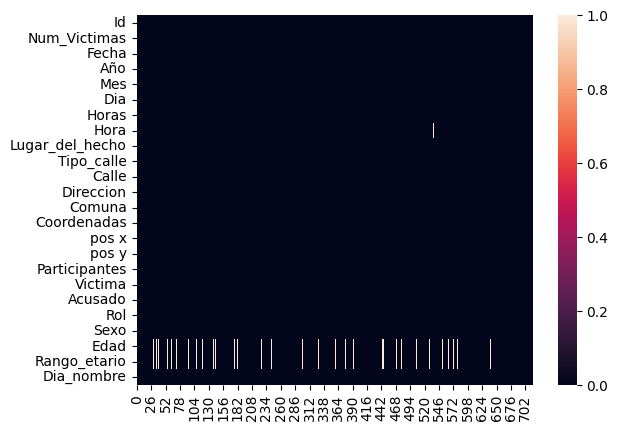

In [55]:
# Visualizacion de los valores nulos / visualization of missing values
(
    siniestros_data
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

In [83]:
# Rellenamos los elementos nulos con 'SD' para variables categoricas y 0 para variables numericos
siniestros_data['Edad'] = siniestros_data['Edad'].fillna(0)
siniestros_data['Rango_etario'] = siniestros_data['Rango_etario'].fillna('SD')
siniestros_data['Calle'] = siniestros_data['Calle'].fillna('SD')
siniestros_data['Hora'] = siniestros_data['Hora'].fillna(0)

In [84]:
siniestros_data['Edad'] = siniestros_data['Edad'].astype('int64')
siniestros_data['Hora'] = siniestros_data['Hora'].astype('int64')
siniestros_data['Comuna'] = siniestros_data['Comuna'].astype('object')

In [85]:
siniestros_data.describe(include=object)

,Id,Horas,Lugar_del_hecho,Tipo_calle,Calle,Direccion,Comuna,Coordenadas,pos x,pos y,Participantes,Victima,Acusado,Rol,Sexo,Rango_etario,Dia_nombre
count,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717
unique,696,346,683,3,280,636,16,606,605,605,41,9,10,5,3,6,7
top,2017-0035,12:30:00,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,"PAZ, GRAL. AV.",SD,1,SD,SD,SD,PEATON-PASAJEROS,MOTO,AUTO,CONDUCTOR,MASCULINO,Entre 21 y 40,Sabado
freq,3,10,4,511,61,9,93,15,13,13,105,302,210,330,545,327,110


In [86]:
siniestros_data.describe(include=[np.number])

,Num_Victimas,Año,Mes,Dia,Hora,Edad
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,1.061367,2018.174338,6.688982,15.953975,11.538354,39.050209
std,0.257024,1.672655,3.575140,8.674876,6.709265,22.010669
min,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,24.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,35.000000
75%,1.000000,2019.000000,10.000000,23.000000,17.000000,55.000000
max,3.000000,2021.000000,12.000000,31.000000,23.000000,95.000000


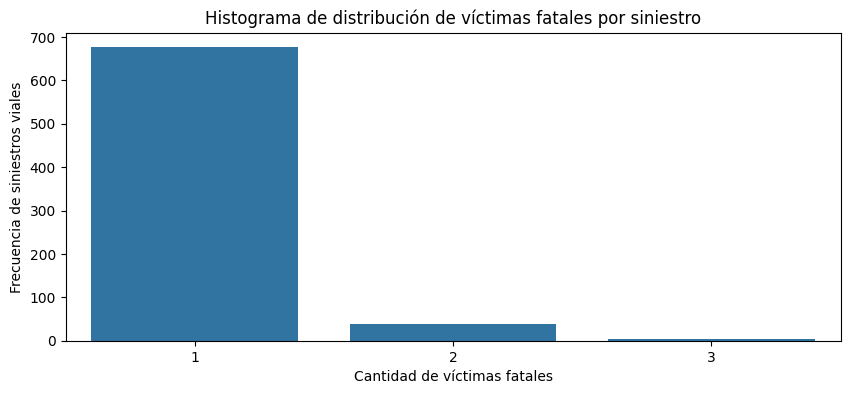

In [87]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = siniestros_data[siniestros_data["Num_Victimas"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x="Num_Victimas")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

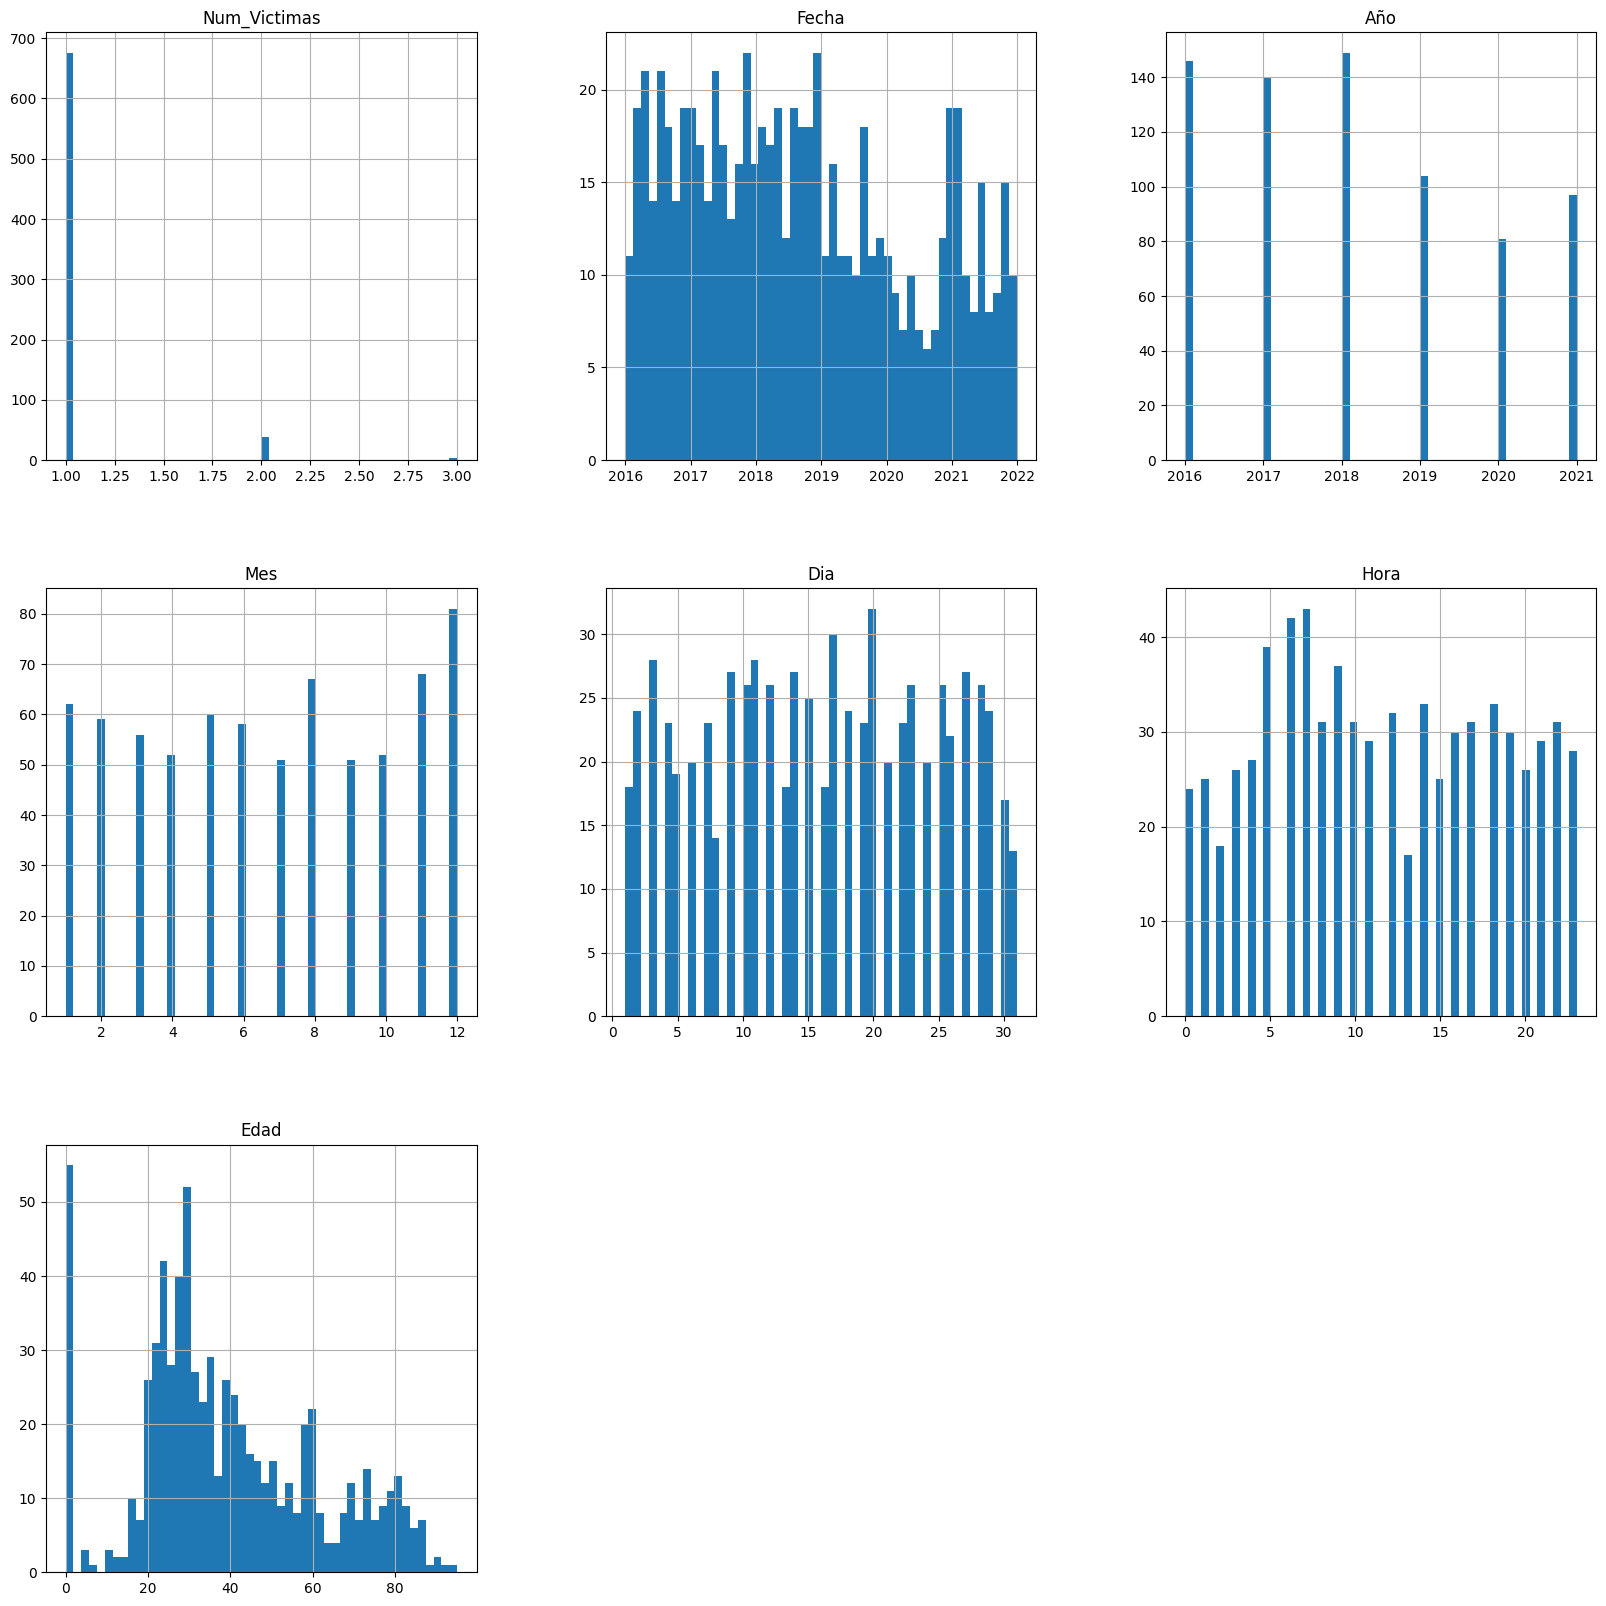

In [88]:
siniestros_data.hist(bins=50,figsize=(20,20))
plt.show